In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)

/Users/hardiksharma/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Step 1 : Load the Iris dataset

In [2]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [3]:
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

## Step 2 : Train and Test split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Step 3 : Scale the train and test data 

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Use fit_transform only on training
X_test_scaled = scaler.transform(X_test)

## Step 4 : Load the K-Nearest Neighbor Model

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
y_pred = knn.predict(X_test_scaled)

## Step 5 : Performance Metrics

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(score)
print(cm)
print(classification_report(y_test, y_pred))

0.9666666666666667
[[10  0  0]
 [ 0  7  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Step 6 : Testing which value of 'K' is suited for our data

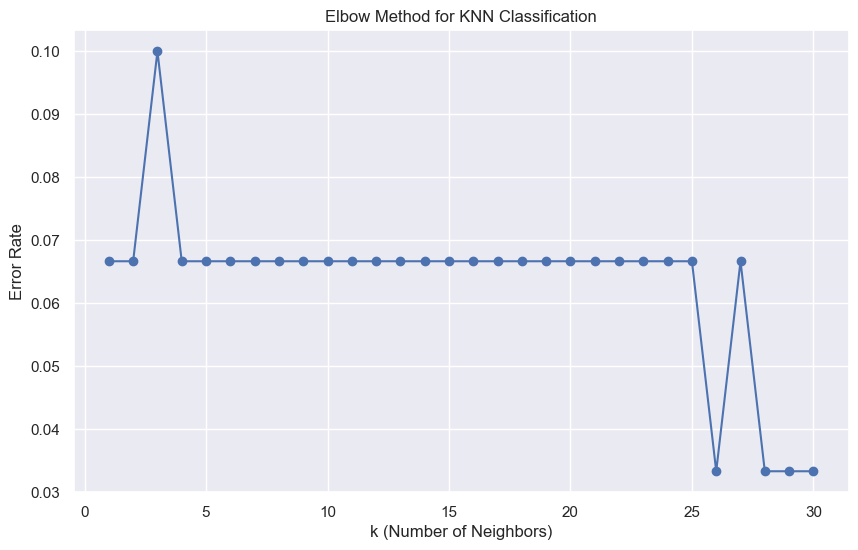

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Use fit_transform only on training
X_test_scaled = scaler.transform(X_test)

error_rates = []
k_values = range(1, 31)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    preds = knn.predict(X_test_scaled)
    error = 1 - accuracy_score(y_test, preds)
    error_rates.append(error)

# Plot
plt.figure(figsize=(10,6))
plt.plot(k_values, error_rates, marker='o')
plt.title('Elbow Method for KNN Classification')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()


### The above elbow plot

This kind of plot is plausible, though not always typical. Let's break down what's going on:

Flat region from k = 1 to ~25: The error rate stays steady around ~0.067(≈93.3% accuracy). Sharp dip at k = 26: Error drops to ~0.033 (≈96.7% accuracy). Slight oscillation after that (k = 27–30): Still stays low.

Our plot is not wrong — it just reflects that KNN performs similarly across a range of k for this data. It’s a good idea to use cross-validation for more robust error estimation and clearer elbows. Consider inspecting the dataset’s structure and class balance if the error is unexpectedly stable or drops suddenly.